# KMeans Implementation

[Jian Tao](https://orcid.org/0000-0003-4228-6089), Texas A&M University

Apr 8, 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Algorithm
We will strictly follow the steps listed below to implement KMeans algorithm:
1. Select the number of clusters  𝑘  that you think is the optimal number. 
2. Initialize  𝑘  points as "centroids" randomly within the space of our data.
3. Attribute each observation to its closest centroid.
4. Update the centroids to the center of all the attributed set of observations.
5. Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4)

## Frist of All, Load the data
This data set is just for testing purpose.

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target # only for plot the first figure.

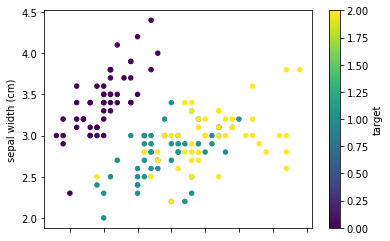

In [4]:
df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)", c="target", colormap='viridis');

## Step 1. Select the number of clusters 𝑘 that you think is the optimal number.

In [5]:
np.random.seed(42)
X = df[["sepal length (cm)", "sepal width (cm)"]].to_numpy()

# this random Centroids is just for testing the functions.
Centroids = df[["sepal length (cm)", "sepal width (cm)"]].sample(n=3).to_numpy(); Centroids

array([[6.1, 2.8],
       [5.7, 3.8],
       [7.7, 2.6]])

## Step 2. Initialize 𝑘 points as "centroids" randomly within the space of our data.

In [6]:
# we will plot the current centroids and the updated centroids for comparison purpose.
def plot_cluster(c, c_n, err=-1):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(x=X[:, 0], y=X[:, 1])
    ax.scatter(x=c[:, 0], y=c[:, 1], s=100, c="y", marker="o", label="Curent Centroids")
    ax.scatter(x=c_n[:, 0], y=c_n[:, 1], s=100, c="r", marker="s", label="Updated Centroids")
    ax.legend()
    ax.set_title("Error: %s"%err)

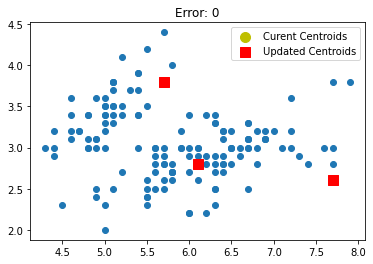

In [7]:
# test the plotting function
plot_cluster(Centroids, Centroids, err=0)

## Step 3. Attribute each observation to its closest centroid.

In [8]:
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [9]:
# X: numpy array - data to be clustered
# e.g.
# X = array([[5.1, 3.5],
#            [4.9, 3. ],
#            [4.7, 3.2]])

# C: numpy array - locations of the current Centroids
# e.g.
# C = array([[6.1, 2.8],
#            [5.7, 3.8],
#            [7.7, 2.6]])

# Return: numpy array - indices to the closest centroids for all X
# e.g.
# Return: 
#      array([1., 0., 2.])
       
def mark_center(X, c):
    num_centers = len(c)
    num_observations = len(X)

    X_c = np.full_like(X[:, 0], -1)

    for i in range(num_observations):
        l = np.argmin([distance(X[i], c[j]) for j in range(num_centers)])
        X_c[i] = l
        
    if np.any(X_c==-1):
        print ("something goes wrong!")
        
    return X_c

In [10]:
mark_center (X, Centroids)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 2., 0., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 2., 2.,
       0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 2., 2., 2., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Step 4. Update the centroids to the center of all the attributed set of observations.

In [11]:
# X: numpy array - data to be clustered
# e.g.
# X = array([[5.1, 3.5],
#            [4.9, 3. ],
#            [4.7, 3.2]])

# C: numpy array - locations of the current Centroids
# e.g.
# C = array([[6.1, 2.8],
#            [5.7, 3.8],
#            [7.7, 2.6]])

# X_c: numpy array - indices to the closest centroids for all X
# e.g. 
# X_c = array([1., 0., 2.])

# Return: 1. numpy array - updated locations of the centroids
#         2. err - distance between C and C_new

def update_centroids(C, X, X_c, plot=True):  
    num_centers = len(C)
    C_new = np.full_like(C, -1)
    
    for i in range(num_centers):
        C_new[i]= np.mean(X[X_c==i], axis=0)
    err = distance(C, C_new)        
    if plot:
        plot_cluster(C, C_new, err=err)
    return C_new, err

## Step 5. Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4)

In [12]:
def My_KMeans(X, n_clusters=3, max_iter=300, tol=1e-05, verbose=True):
    max_iter = max_iter
    tol = tol
    my_iter=1.0
    my_tol = 1.0
    Centroids = X[np.random.choice(range(len(X)), n_clusters)]
    if verbose:
        plot=True
    while my_iter < max_iter and my_tol > tol:
        X_C = mark_center(X, Centroids)
        Centroids, my_tol=update_centroids(Centroids, X, X_C, plot=verbose)
        if verbose:
            print (my_tol)
        my_iter+=1
    print ("Options are: max_iter=%s, tol=%s"%(max_iter, tol))    
    print ("Centrolds are: ", Centroids)
    return Centroids

### Set verbose to True to see the plots

In [13]:
Centroids = My_KMeans(X, n_clusters=3, tol=0.01, max_iter=300, verbose=False)

Options are: max_iter=300, tol=0.01
Centrolds are:  [[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]


In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, tol=0.00001, max_iter=300)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=1e-05, verbose=0)

In [15]:
km.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])